## <font color='green'> Application of the LASSO to Boston Data

In [126]:
import os
os.chdir('')

import numpy as np
import pandas as pd
import math

np.set_printoptions(precision=3, suppress=True)

raw0 = pd.read_csv('Boston.csv')

In [127]:
raw0.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [128]:
# Store variable names for labeling later
varname=list(raw0.iloc[:,1:-1].columns)

# Define y and X (including all the regressors)
raw0 = raw0.iloc[:,1:].values
Y = raw0[:,-1]
X = raw0[:,0:-1]

TypeError: 'list' object is not callable

In [129]:
varname

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'League',
 'Division',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

### <font color='green'> 1) Lasso Estimation with a Preselected Tuning Parameter Value ($\lambda$)

Parameters in linear_model.Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [130]:
from sklearn import linear_model
# Does not accept 0
las1 = linear_model.Lasso(alpha=0.000001).fit(X,Y) # alpha is the tuning parameter
las2 = linear_model.Lasso(alpha=0.5).fit(X,Y) # alpha is the tuning parameter

C:\Users\kgame\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.612107015322483, tolerance: 0.007980124223602484
  model = cd_fast.enet_coordinate_descent(


In [131]:
print(las1.coef_)
print(las2.coef_)

[ 0.     0.002 -0.    -0.    -0.001  0.007  0.    -0.001 -0.001  0.001
  0.001  0.     0.871 -0.011 -0.    -0.     0.004  0.   ]
[ 0.     0.     0.     0.002 -0.001  0.     0.    -0.001  0.     0.001
  0.    -0.     0.    -0.    -0.    -0.    -0.    -0.   ]


In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
Xn = scaler.transform(X)


In [133]:
las1 = linear_model.Lasso(alpha=0.000001).fit(Xn,Y) # alpha is the tuning parameter
las2 = linear_model.Lasso(alpha=0.5).fit(Xn,Y) # alpha is the tuning parameter

C:\Users\kgame\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.318126262481053, tolerance: 0.007980124223602484
  model = cd_fast.enet_coordinate_descent(


In [134]:
print(las1.coef_)
print(las2.coef_)

[ 0.001  0.022 -0.005 -0.004 -0.029  0.032  0.026 -0.413 -0.113  0.237
  0.204  0.021  0.434 -0.006 -0.001 -0.004  0.025  0.006]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0.]


### <font color='green'> 2) Computation of a Lasso Solution Path
Parameters and returns in lasso_path: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html

In [135]:
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from itertools import cycle

In [136]:
# Use "eps" to specify the length and density of the grid (eps = alpha_min / alpha_max)
eps = 1e-10  
alphas_lasso, coefs_lasso, _ = lasso_path(Xn, Y, eps = eps)

C:\Users\kgame\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0227357580534715, tolerance: 0.0176
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kgame\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021764950604719502, tolerance: 0.0176
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kgame\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06908239109101544, tolerance: 0.0176
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\kgame\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective

In [137]:
## Largest to smallest alphas
print(alphas_lasso) 

[0.439 0.348 0.275 0.218 0.173 0.137 0.109 0.086 0.068 0.054 0.043 0.034
 0.027 0.021 0.017 0.013 0.011 0.008 0.007 0.005 0.004 0.003 0.003 0.002
 0.002 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


In [138]:
print(coefs_lasso)

[[ 0.     0.     0.    ...  0.004  0.004  0.004]
 [ 0.     0.     0.    ...  0.023  0.023  0.023]
 [ 0.     0.     0.    ... -0.007 -0.007 -0.007]
 ...
 [-0.    -0.    -0.    ... -0.004 -0.004 -0.004]
 [-0.    -0.    -0.    ...  0.025  0.025  0.025]
 [ 0.     0.    -0.    ...  0.006  0.006  0.006]]


In [139]:
# Each row of "coefs_lasso" contains a series of estimates for a coefficient over the grid
# Each column contains coefficient etimates at each lambda value
## From large alpha to small alpha
print(coefs_lasso[2]) 

[ 0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
 -0.     0.     0.     0.     0.     0.004  0.009  0.012  0.011  0.012
  0.011  0.008  0.005  0.003  0.002  0.001  0.     0.    -0.    -0.001
 -0.002 -0.003 -0.003 -0.004 -0.005 -0.005 -0.005 -0.006 -0.006 -0.006
 -0.006 -0.006 -0.006 -0.006 -0.006 -0.007 -0.007 -0.007 -0.007 -0.007
 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007
 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007
 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007
 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007 -0.007]


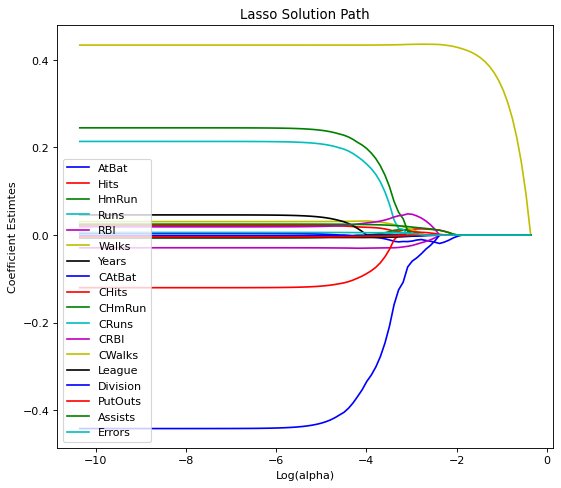

In [140]:
# Display the solution path
plt.figure(figsize=(8, 7), dpi=80)
colors = cycle(['b', 'r', 'g', 'c','m', 'y', 'k'])

# Take the log of the alpha values to adjust the scale of X-axis
log_alphas_lasso = np.log10(alphas_lasso) 

# Use a for-loop to plot several paths on a figure 
# Zip temporarily holds the values in ()
## Coef_L grabs a row for a coefficient at each lasso
for coef_l, c, vn in zip(coefs_lasso, colors, varname):
    l1 = plt.plot(log_alphas_lasso, coef_l, c=c, label=vn)
    
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficient Estimtes')
plt.title('Lasso Solution Path')
plt.legend()
plt.savefig('lassopath.png')
plt.show()


### <font color='green'> 3) Selection of a Tuning Parameter Value (= Selection of a Model) in the LASSO using CV/BIC/AIC

In [141]:
from sklearn.linear_model import LassoLarsCV, LassoLarsIC
import time

#### <font color='green'> i) Cross Validation

In [142]:
t1 = time.time() # Get the current time
lascv = LassoLarsCV(cv=10).fit(Xn, Y)
t_lasso_lars_cv = time.time() - t1 # Calculate running time

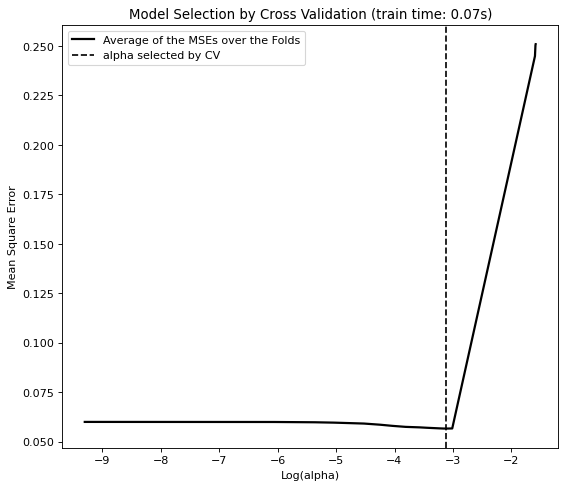

In [143]:
# Display the results
eps = 5e-10

# cv_alphas : set of lambda values used
# alpha: The best one

lascv_log_alphas = np.log10(lascv.cv_alphas_ + eps) 
lascv_log_alpha = np.log10(lascv.alpha_)
# Caution: lascv.alphas contains the alpha at the lowest MSE whereas lascv.cv_alphas_ contains the set of alphas used in the path
# The smallest value in lascv.cv_alphas_ is 0 so we add eps (a small number) to avoid log(0)

plt.figure(figsize=(8, 7), dpi=80)
plt.plot(lascv_log_alphas, lascv.mse_path_.mean(axis=1), 'k',
         label='Average of the MSEs over the Folds', linewidth=2)
plt.axvline(lascv_log_alpha, linestyle='--', color='k',
            label='alpha selected by CV')
plt.legend()

plt.xlabel('Log(alpha)')
plt.ylabel('Mean Square Error')
plt.title('Model Selection by Cross Validation (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.show()

In [144]:
# Access the Lasso estimates at the alpha selected by CV
print(lascv.coef_)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.425 0.    0.    0.    0.    0.   ]


#### <font color='green'> ii) BIC and AIC

In [145]:
lasic_bic = LassoLarsIC(criterion='bic').fit(Xn, Y)
lasic_aic = LassoLarsIC(criterion='aic').fit(Xn, Y)

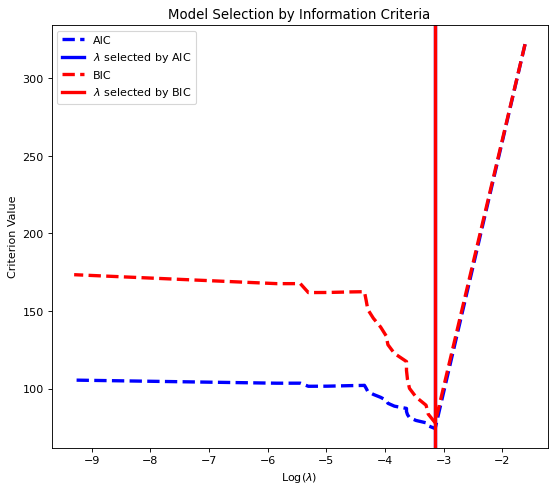

In [146]:
# Display results
# make a fn to produce figures with the same features repeatedly
def plot_ic_criterion(model, name, color): 
    # alpha - the best one
    alpha_ = model.alpha_ + eps
    alphas_ = model.alphas_ + eps
    criterion_ = model.criterion_ # BIC or AIC values over the alpha values
    plt.plot(np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s' % name)
    plt.axvline(np.log10(alpha_), color=color, linewidth=3,
                label='$\lambda$ selected by %s ' % name)
    plt.xlabel('Log($\lambda$)')
    plt.ylabel('Criterion Value')
    
## AIC tends to choose a smaller lambda/ more complex model
plt.figure(figsize=(8, 7), dpi=80)
plot_ic_criterion(lasic_aic, 'AIC', 'b')
plot_ic_criterion(lasic_bic, 'BIC', 'r')
plt.legend()
plt.title('Model Selection by Information Criteria')
#plt.show()
plt.savefig('lasso.png')

In [147]:
# Access the Lasso estimates at the alpha selected by AIC and BIC
print(lasic_aic.coef_)
print(lasic_bic.coef_)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.426 0.    0.    0.    0.    0.   ]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.426 0.    0.    0.    0.    0.   ]


### <font color='darkred'> HW5
    
* Use the dataset, "Hitters.csv", posted on BB to explain/predict a baseball player’s salary <u> using a subset of covariates in the dataset </u>.
    
* In order to select a subset of covariates, do the following:
    - Forward and backward stepwise selections based on AIC and BIC
    - LASSO Estimations with CV, AIC and BIC
    - Produce tables or figures or both to summarize your results
    
* For this exercise, you need to take care of missing values and also generate dummies for some variables

### <font color='purple'> 1. Importing and Cleaning the Data

In [148]:
import os
os.chdir('')

import numpy as np
import pandas as pd
import math

raw00 = pd.read_csv('Hitters.csv')

In [149]:
raw00.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [150]:
varname=list(raw00.iloc[:,1:-1].columns)

TypeError: 'list' object is not callable

In [165]:
varname

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'League',
 'Division',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [152]:
#print(raw00.isnull().sum())

In [153]:
raw00['Salary'].fillna(raw00['Salary'].mean(), inplace = True)
#print(raw00.isnull().sum())

In [154]:
raw00.League = (raw00.League == 'A')*1

In [155]:
raw00.Division = (raw00.Division == 'E')*1

In [156]:
raw00.NewLeague = (raw00.NewLeague == 'A')*1

In [157]:
raw00.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,1,1,446,33,20,535.925882,1
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,0,0,632,43,10,475.000000,0
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,1,0,880,82,14,480.000000,1
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,0,1,200,11,3,500.000000,0
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,0,1,805,40,4,91.500000,0


In [158]:
raw00[[c for c in raw00 if c not in ['Salary', 'NewLeague']] 
       + ['NewLeague', 'Salary']]

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague,Salary
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,1,1,446,33,20,1,535.925882
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,0,0,632,43,10,0,475.000000
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,1,0,880,82,14,1,480.000000
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,0,1,200,11,3,0,500.000000
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,0,1,805,40,4,0,91.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,0,1,325,9,3,0,700.000000
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,1,1,313,381,20,1,875.000000
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,1,0,37,113,7,1,385.000000
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,1,1,1314,131,12,1,960.000000


### <font color='purple'> 2. Performing LASSO and CV/AIC/BIC Regression

In [159]:
raw00 = raw00.iloc[:,1:].values
Y = raw00[:,-1]
X = raw00[:,1:-1]

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
Xn = scaler.transform(X)


In [161]:
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from itertools import cycle

In [162]:
eps = .001
alphas_lasso, coefs_lasso, _ = lasso_path(Xn, Y, eps = eps)

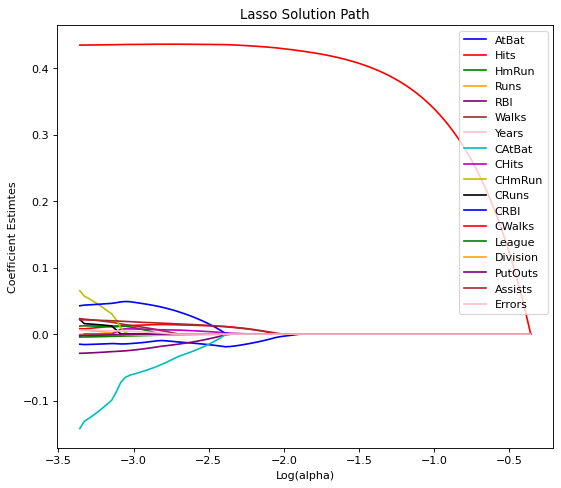

In [163]:
# Display the solution path
plt.figure(figsize=(8, 7), dpi=80)
colors = cycle(['b', 'r', 'g','orange', 'purple', 'brown', 'pink', 'c','m', 'y', 'k'])

# Take the log of the alpha values to adjust the scale of X-axis
log_alphas_lasso = np.log10(alphas_lasso) 

# Use a for-loop to plot several paths on a figure 
# Zip temporarily holds the values in ()
## Coef_L grabs a row for a coefficient at each lasso
for coef_l, c, vn in zip(coefs_lasso, colors, varname):
    l1 = plt.plot(log_alphas_lasso, coef_l, c=c, label=vn)
    
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficient Estimtes')
plt.title('Lasso Solution Path')
plt.legend()
plt.savefig('lassopath.png')
plt.show()

In [164]:
t1 = time.time() # Get the current time
lascv = LassoLarsCV(cv=10).fit(Xn, Y)
t_lasso_lars_cv = time.time() - t1 # Calculate running time

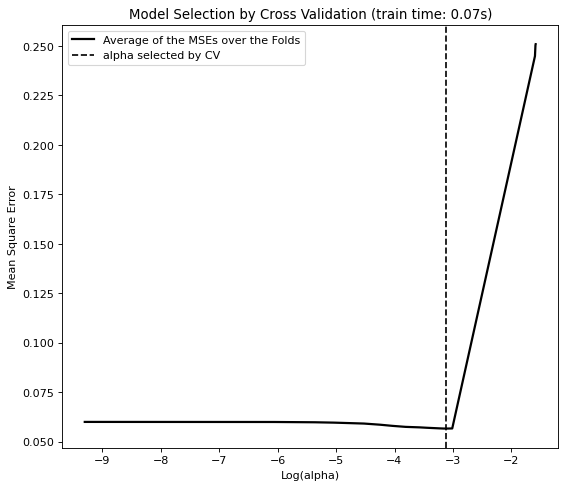

In [61]:
# Display the results
eps = 5e-10

# cv_alphas : set of lambda values used
# alpha: The best one

lascv_log_alphas = np.log10(lascv.cv_alphas_ + eps) 
lascv_log_alpha = np.log10(lascv.alpha_)
# Caution: lascv.alphas contains the alpha at the lowest MSE whereas lascv.cv_alphas_ contains the set of alphas used in the path
# The smallest value in lascv.cv_alphas_ is 0 so we add eps (a small number) to avoid log(0)

plt.figure(figsize=(8, 7), dpi=80)
plt.plot(lascv_log_alphas, lascv.mse_path_.mean(axis=1), 'k',
         label='Average of the MSEs over the Folds', linewidth=2)
plt.axvline(lascv_log_alpha, linestyle='--', color='k',
            label='alpha selected by CV')
plt.legend()

plt.xlabel('Log(alpha)')
plt.ylabel('Mean Square Error')
plt.title('Model Selection by Cross Validation (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.show()

In [62]:
print(lascv.coef_)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.425 0.    0.    0.    0.    0.   ]


153.32574771974558
193.02386744645017


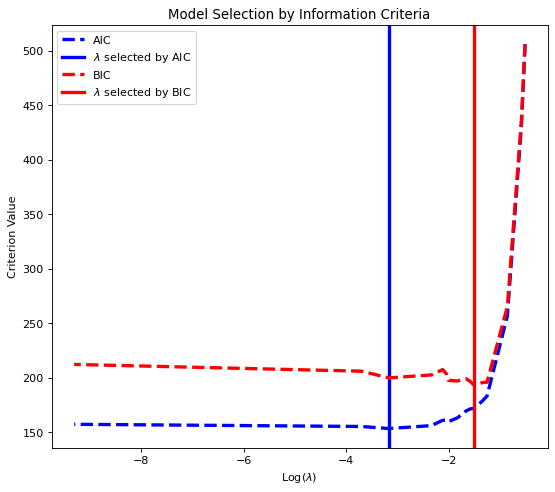

In [63]:
# Display results
# make a fn to produce figures with the same features repeatedly

LassoAIC = 0
LassoBIC = 0

def plot_ic_criterion(model, name, color): 
    # alpha - the best one
    alpha_ = model.alpha_ + eps
    alphas_ = model.alphas_ + eps
    criterion_ = model.criterion_ # BIC or AIC values over the alpha values
    plt.plot(np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s' % name)
    plt.axvline(np.log10(alpha_), color=color, linewidth=3,
                label='$\lambda$ selected by %s ' % name)
    plt.xlabel('Log($\lambda$)')
    plt.ylabel('Criterion Value')
    return np.min(criterion_)
    
## AIC tends to choose a smaller lambda/ more complex model
plt.figure(figsize=(8, 7), dpi=80)
LassoAIC = plot_ic_criterion(lasic_aic, 'AIC', 'b')
print(LassoAIC)
LassoBIC = plot_ic_criterion(lasic_bic, 'BIC', 'r')
print(LassoBIC)
plt.legend()
plt.title('Model Selection by Information Criteria')
#plt.show()
plt.savefig('lasso.png')

In [64]:
print(lasic_bic.coef_)

[ 0.     0.     0.     0.258  0.     2.883  0.     0.     0.     0.
 -1.501  0.408 -3.59 ]


In [65]:
print(lasic_aic.coef_)

[-0.887  1.014  0.     0.685 -1.946  2.692  0.    -3.032  2.394 -1.812
 -2.028  0.835 -3.728]


### <font color='purple'> 3. Performing Forward Selection

In [66]:
import statsmodels.api as sm
# Code for forward selection based on BIC
ncol=Xn.shape[1]

pcand = list(range(ncol)) # A list to keep track of the set of predictors left to add to the model at each iteration
psel = [] # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
tb = np.zeros(ncol) # A vector to store the BIC of the selected model at each iteration
p = 0 # Iteration idex

while len(psel) != ncol: # Repeat below until the model includes all the predictors
    tb0 = np.zeros((len(pcand),2)) # Store Rsquare(s) and BIC(s) of the models under consideration at each iteration

    for i in range(0,len(pcand)):
        psel0 = psel + [pcand[i]] # "psel0" is a temporary version of psel which includes one of the predictors in pcan and those in psel
        # Caution: "+" combines two lists, but not a list and an integer (i.e pcan[i])
        #psel0 includes column number - variables associated with column numbers
        XX = Xn[:,psel0]
        XX = sm.add_constant(XX)
        model = sm.OLS(Y, XX)
        res = model.fit()
        tb0[i,:] = [res.rsquared, res.bic]
    
    ind = np.argmax(tb0[:,0]) # Find the regressor that results in the largest Rsquare when added to the model
    psel = psel + [pcand[ind]] # Add the selected regressor to psel
    pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
    tb[p] =  tb0[ind,1] # Store the BIC of the selected model at this iteration
    p += 1

In [67]:
# Select the model that has the smallest BIC among the selected models over the iterations
psel[:(np.argmin(tb)+1)]

[12]

In [68]:
ForwardBICNumber = len(psel[:(np.argmin(tb)+1)])
#print(ForwardBICNumber)

ForwardBIC = tb[psel[:(np.argmin(tb))]]
ForwardBIC = tb[12]

ForwardBIC

51.920116959680996

In [69]:
import statsmodels.api as sm
# Code for forward selection based on BIC
ncol=Xn.shape[1]

pcand = list(range(ncol)) # A list to keep track of the set of predictors left to add to the model at each iteration
psel = [] # A list to keep track of the selected predictors at each iteration (the order of the selected predictors)
tb = np.zeros(ncol) # A vector to store the BIC of the selected model at each iteration
p = 0 # Iteration idex

while len(psel) != ncol: # Repeat below until the model includes all the predictors
    tb0 = np.zeros((len(pcand),2)) # Store Rsquare(s) and BIC(s) of the models under consideration at each iteration

    for i in range(0,len(pcand)):
        psel0 = psel + [pcand[i]] # "psel0" is a temporary version of psel which includes one of the predictors in pcan and those in psel
        # Caution: "+" combines two lists, but not a list and an integer (i.e pcan[i])
        #psel0 includes column number - variables associated with column numbers
        XX = Xn[:,psel0]
        XX = sm.add_constant(XX)
        model = sm.OLS(Y, XX)
        res = model.fit()
        tb0[i,:] = [res.rsquared, res.aic]
    
    ind = np.argmax(tb0[:,0]) # Find the regressor that results in the largest Rsquare when added to the model
    psel = psel + [pcand[ind]] # Add the selected regressor to psel
    pcand.remove(pcand[ind]) # Remove the selected regressor from pcand
    tb[p] =  tb0[ind,1] # Store the BIC of the selected model at this iteration
    p += 1

In [70]:
psel

[12, 0, 1, 16, 2, 4, 11, 7, 9, 5, 10, 8, 13, 17, 6, 15, 3, 14]

In [71]:
# Select the model that has the smallest AIC among the selected models over the iterations
psel[:(np.argmin(tb)+1)]

[12]

In [72]:
ForwardAICNumber = len(psel[:(np.argmin(tb)+1)])
#ForwardAICNumber

ForwardAIC = tb[psel[:(np.argmin(tb))]]
ForwardAIC = tb[12]




### <font color='purple'> 4. Performing Backward Selection

In [97]:
pcand = list(range(ncol)) 
psel = [] 
tb = np.zeros(ncol) 
p = 0 

while len(psel) != ncol: 
    tb0 = np.zeros((len(pcand),2)) 

    for i in range(0,len(pcand)):
        psel0 = pcand.copy() # line 1
        psel0.remove(psel0[i]) # line 2
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        res = sm.OLS(Y, XX).fit()
        tb0[i,:] = [res.rsquared, res.bic]
    
    ind = np.argmax(tb0[:,0]) 
    psel = psel + [pcand[ind]] 
    pcand.remove(pcand[ind]) 
    tb[p] =  tb0[ind,1] 
    p += 1


In [98]:
pselr = psel[:(np.argmin(tb)+1)]

In [113]:
BackwardBICNumber = len(psel) - len(psel[:(np.argmin(tb)+1)])
#BackwardBICNumber

#list(set(psel) - set(pselr))

BackwardBIC = tb[13]
BackwardBIC


6.867425552494975

In [181]:
pcand = list(range(ncol)) 
psel = [] 
tb = np.zeros(ncol) 
p = 0 

while len(psel) != ncol: 
    tb0 = np.zeros((len(pcand),2)) 

    for i in range(0,len(pcand)):
        psel0 = pcand.copy() # line 1
        psel0.remove(psel0[i]) # line 2
        XX = X[:,psel0]
        XX = sm.add_constant(XX)
        res = sm.OLS(Y, XX).fit()
        tb0[i,:] = [res.rsquared, res.aic]
    
    ind = np.argmax(tb0[:,0]) 
    psel = psel + [pcand[ind]] 
    pcand.remove(pcand[ind]) 
    tb[p] =  tb0[ind,1] 
    p += 1

AttributeError: 'int' object has no attribute 'copy'

In [169]:
psel[:(np.argmin(tb)+1)]

[0, 14, 3, 2, 15, 6, 17, 13, 11, 1, 5, 8, 10, 16, 4, 9, 7]

In [170]:
print(psel)

[0, 14, 3, 2, 15, 6, 17, 13, 11, 1, 5, 8, 10, 16, 4, 9, 7, 12]


In [175]:
BackwardAICNumber = len(psel) - len(psel[:(np.argmin(tb)+1)])
BackwardAICNumber

BackwardAIC = tb[13]
BackwardAIC 

6.867425552494975

### <font color='purple'> 5. Results

In [176]:
np.set_printoptions(precision=10)

print('************************BIC************************')

print('Lasso - Coefficients: 1  - BIC: ', LassoBIC)
print('Forward - Coefficients: ', ForwardBICNumber, ' - BIC: ', ForwardBIC)
print('Backwards - Coefficients: ', BackwardBICNumber, ' - BIC: ', BackwardBIC)

print('************************AIC************************')

print('Lasso - Coefficients: 1  -  AIC: ', LassoAIC)
print('Forward - Coefficients: ', ForwardAICNumber, ' - AIC: ', ForwardAIC)
print('Backwards - Coefficients: ', BackwardAICNumber, ' - AIC: ', BackwardAIC)

************************BIC************************
Lasso - Coefficients: 1  - BIC:  193.02386744645017
Forward - Coefficients:  1  - BIC:  51.920116959680996
Backwards - Coefficients:  1  - BIC:  6.867425552494975
************************AIC************************
Lasso - Coefficients: 1  -  AIC:  153.32574771974558
Forward - Coefficients:  1  - AIC:  -0.9236046779407161
Backwards - Coefficients:  1  - AIC:  6.867425552494975
